# Regression using two datasets

1. ÌîÑÎ°úÏ†ùÌä∏ 1Ïùò ÌöåÍ∑ÄÎ™®Îç∏ ÏòàÏ∏°Ï†ïÌôïÎèÑÍ∞Ä Í∏∞Ï§Ä Ïù¥ÏÉÅ : mse 3000Ïù¥Ìïò Îã¨ÏÑ±
2. ÌîÑÎ°úÏ†ùÌä∏ 2Ïùò ÌöåÍ∑ÄÎ™®Îç∏ ÏòàÏ∏°Ï†ïÌôïÎèÑÍ∞Ä Í∏∞Ï§Ä Ïù¥ÏÉÅ : rmse 150 Ïù¥Ìïò Îã¨ÏÑ±
3. ÏãúÍ∞ÅÌôî ÏöîÍµ¨ÏÇ¨Ìï≠Ïù¥ Ï†ïÌôïÌûà Ïù¥Î§ÑÏ°åÎäîÍ∞Ä? : Îç∞Ïù¥ÌÑ∞Í∞úÏàò ÏãúÍ∞ÅÌôî Î∞è ÏòàÏ∏°Í≤∞Í≥º Î™®Îëê ÏãúÍ∞ÅÌôî



# 1. ÏÜêÏàò ÏÑ§Í≥ÑÌïòÎäî ÏÑ†ÌòïÌöåÍ∑Ä : ÎãπÎá®Î≥ë ÏàòÏπòÎ•º ÎßûÏ∂∞Î≥¥Ïûê
## 1-1. Îç∞Ïù¥ÌÑ∞ÏÖã
### (1) Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [1]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Ìò∏Ï∂ú
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ÌïÑÏöîÌïú Î™®Îìà import
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
diabetes = load_diabetes()

dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
type(diabetes.data)

numpy.ndarray

dataÏùò Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖÏù¥ ndarrayÏù¥ÎØÄÎ°ú dataframe ÌòïÌÉúÎ°ú Î∞îÍøîÏ§òÎèÑ Ï¢ãÏùÑ Í≤É Í∞ôÎã§.

In [7]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [8]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### (2) Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

dataÏóê Îì§Ïñ¥ÏûàÎäî ÌîºÏ≥êÎì§ÏùÑ Îã§Ïãú ÌôïÏù∏Ìï¥Î≥¥Ïûê

  - age : ÎÇòÏù¥
  - sex : ÏÑ±Î≥Ñ
  - bmi : Ï≤¥ÏßàÎüâÏßÄÏàò(Î™∏Î¨¥Í≤å(kg)Î•º ÌÇ§ÏùòÏ†úÍ≥±(m)ÏúºÎ°ú ÎÇòÎàà Í∞í)
  - bp  : ÌèâÍ∑†ÌòàÏïï
  - s1  : ÌòàÏ§ë ÏΩúÎ†àÏä§ÌÖåÎ°§
  - s2  : Ï†ÄÎ∞ÄÎèÑ ÏΩúÎ†àÏä§ÌÖåÎ°§
  - s3  : Í≥†Î∞ÄÎèÑ ÏΩúÎ†àÏä§ÌÖåÎ°§
  - s4  : ÏΩúÎ†àÏä§ÌÖåÎ°§ Ï¥ùÎüâ
  - s5  : ÌòàÏ≤≠ Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏Î¶¨Îìú ÏàòÏπòÏùò Í∏∞Î°ù
  - s6  : ÌòàÎãπÏπò
  
-  ÏßàÎ≥ëÍ¥ÄÎ¶¨Ï≤≠Ïùò Ï†ïÎ≥¥Î•º Ï∞∏Í≥†Ìï¥Î≥¥Îãà, Ïù¥ Ï§ë ÎãπÎá®ÏôÄ Í¥ÄÎ†®Ïù¥ Ï†ÅÏùÄ ÌîºÏ≤òÎäî ÏÑ±Î≥ÑÏù¥ÎØÄÎ°ú ÏßÄÏõåÏ§òÎèÑ Îê† Í≤É Í∞ôÎã§Í≥† ÌåêÎã®ÌñàÎã§.

In [9]:
# ÌîºÏ≥ê ÏÇ≠Ï†úÎ•º ÏúÑÌï¥ Î®ºÏ†Ä DataFrameÏúºÎ°ú Î∞îÍøîÏ§ÄÎã§
data_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data_df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1   -0.039493 -0.068330 -0.092204  
2   -0.002592  0.002864 -0.025930  
3    0.034309  0.022692 -0.009362  
4   -0.002592 -0.031991 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018118  0.044485  
439 -0.011080 -0.046879  0.015491  
440  0.026560  0.044528 -0.025930  
441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

In [10]:
data_df = data_df.drop(columns="sex")
data_df

age       bmi        bp        s1        s2        s3        s4  \
0    0.038076  0.061696  0.021872 -0.044223 -0.034821 -0.043401 -0.002592   
1   -0.001882 -0.051474 -0.026328 -0.008449 -0.019163  0.074412 -0.039493   
2    0.085299  0.044451 -0.005671 -0.045599 -0.034194 -0.032356 -0.002592   
3   -0.089063 -0.011595 -0.036656  0.012191  0.024991 -0.036038  0.034309   
4    0.005383 -0.036385  0.021872  0.003935  0.015596  0.008142 -0.002592   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.019662  0.059744 -0.005697 -0.002566 -0.028674 -0.002592   
438 -0.005515 -0.015906 -0.067642  0.049341  0.079165 -0.028674  0.034309   
439  0.041708 -0.015906  0.017282 -0.037344 -0.013840 -0.024993 -0.011080   
440 -0.045472  0.039062  0.001215  0.016318  0.015283 -0.028674  0.026560   
441 -0.045472 -0.073030 -0.081414  0.083740  0.027809  0.173816 -0.039493   

           s5        s6  
0    0.019908 -0.017646  
1   -0.068330 -0.092204  
2    0.002864 -0.025930  
3    0.022692 -0.009362  
4   -0.031991 -0.046641  
..        ...       ...  
437  0.031193  0.007207  
438 -0.018118  0.044485  
439 -0.046879  0.015491  
440  0.044528 -0.025930  
441 -0.004220  0.003064  

[442 rows x 9 columns]

### (3) Î™®Îç∏Ïóê ÏûÖÎ†•Ìï† Îç∞Ïù¥ÌÑ∞ X Ï§ÄÎπÑÌïòÍ∏∞ 

In [11]:
df_x = data_df
df_y = diabetes.target

In [12]:
# Î™®Îç∏Ïóê ÏûÖÎ†•Ìï† Îç∞Ïù¥ÌÑ∞ x Ï§ÄÎπÑÌïòÍ∏∞
df_x = np.array(df_x)
df_x

array([[ 0.03807591,  0.06169621,  0.02187235, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.05147406, -0.02632783, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.04445121, -0.00567061, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844, -0.01590626,  0.01728186, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248,  0.03906215,  0.00121513, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.0730303 , -0.08141377, ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [13]:
# Î™®Îç∏Ïóê ÏòàÏ∏°Ìï† Îç∞Ïù¥ÌÑ∞ y Ï§ÄÎπÑÌïòÍ∏∞
df_y = np.array(df_y)
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## 1-2 Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x,
                                                    df_y,
                                                    test_size = 0.2,
                                                    random_state = 8
                                                    )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 9) (89, 9) (353,) (89,)


## 1-3. Î™®Îç∏ Ï§ÄÎπÑ

In [15]:
# Í∞ÄÏ§ëÏπò WÏôÄ b Ï§ÄÎπÑ
W = np.random.rand(9)
b = np.random.rand()

In [16]:
W

array([0.02532541, 0.53635855, 0.9839267 , 0.93426564, 0.98019948,
       0.36367027, 0.00571322, 0.75944245, 0.58392288])

In [17]:
b

0.20530681448239874

In [18]:
# Î™®Îç∏ Ìï®Ïàò Íµ¨ÌòÑ
def model(df_x, W, b):
    predictions = 0
    for i in range(9):
        predictions += df_x[:, i] * W[i]
    predictions += b
    return predictions

## 1-4. ÏÜêÏã§Ìï®Ïàò loss Ï†ïÏùò

In [19]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # Îëê Í∞íÏùò Ï∞®Ïù¥Ïùò Ï†úÍ≥±Ïùò ÌèâÍ∑†
    return mse

In [20]:
def loss(df_x, W, b, df_y):
    predictions = model(df_x, W, b)
    L = MSE(predictions, df_y)
    return L

## 1-5. Í∏∞Ïö∏Í∏∞Î•º Íµ¨ÌïòÎäî gradient Ìï®Ïàò Íµ¨ÌòÑ

In [21]:
def gradient(df_x, W, b, df_y):
    # NÏùÄ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïùò Í∞úÏàò
    N = len(df_y)
    
    # y_pred Ï§ÄÎπÑ
    y_pred = model(df_x, W, b)
    
    # Í≥µÏãùÏóê ÎßûÍ≤å gradient Í≥ÑÏÇ∞
    dW = 1/N * 2 * df_x.T.dot(y_pred - df_y)
        
    # bÏùò gradient Í≥ÑÏÇ∞
    db = 2 * (y_pred - df_y).mean()
    return dW, db

In [22]:
dW, db = gradient(df_x, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.37065576 -4.28769702 -3.22473057 -1.54053678 -1.26377683  2.88924547
 -3.14388732 -4.13494295 -2.79273185]
db: -303.85635469682705


## 1-6. ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Ïù∏ ÌïôÏäµÎ•† ÏÑ§Ï†ï

In [23]:
LEARNING_RATE = 0.1

ÌïôÏäµÎ•†ÏùÑ 0.1Î°ú ÏÑ§Ï†ïÌïòÏòÄÏùÑ ÎïåÍ∞Ä Í∞ÄÏû• Í≤∞Í≥ºÍ∞Ä Ï¢ãÏïòÎã§.

## 1-7. Î™®Îç∏ ÌïôÏäµ

In [24]:
losses = []

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5299.2870
Iteration 200 : Loss 4827.9900
Iteration 300 : Loss 4477.0095
Iteration 400 : Loss 4212.5893
Iteration 500 : Loss 4010.8112
Iteration 600 : Loss 3854.6846
Iteration 700 : Loss 3732.1028
Iteration 800 : Loss 3634.4056
Iteration 900 : Loss 3555.3698
Iteration 1000 : Loss 3490.4978
Iteration 1100 : Loss 3436.5181
Iteration 1200 : Loss 3391.0317
Iteration 1300 : Loss 3352.2636
Iteration 1400 : Loss 3318.8871
Iteration 1500 : Loss 3289.8986
Iteration 1600 : Loss 3264.5298
Iteration 1700 : Loss 3242.1842
Iteration 1800 : Loss 3222.3925
Iteration 1900 : Loss 3204.7803
Iteration 2000 : Loss 3189.0443
Iteration 2100 : Loss 3174.9362
Iteration 2200 : Loss 3162.2497
Iteration 2300 : Loss 3150.8116
Iteration 2400 : Loss 3140.4752
Iteration 2500 : Loss 3131.1148
Iteration 2600 : Loss 3122.6220
Iteration 2700 : Loss 3114.9030
Iteration 2800 : Loss 3107.8757
Iteration 2900 : Loss 3101.4681
Iteration 3000 : Loss 3095.6170
Iteration 3100 : Loss 3090.2663
Iteration 3200 : 

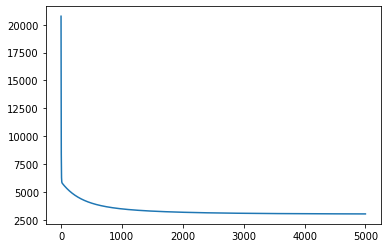

In [25]:
plt.plot(losses)
plt.show()

In [26]:
W

array([  -6.46551274,  507.50008525,  313.99468983,  -64.67610356,
       -121.05804849, -181.68899535,  101.01477436,  370.15411204,
        139.33727762])

In [27]:
b

152.10052990046682

## 1-8. test Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÑ±Îä• ÌôïÏù∏

In [28]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2941.430949138124

## 1-9. Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏°Ìïú Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

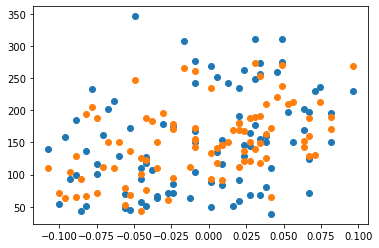

In [29]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 2. ÎÇ†Ïî® Ï¢ãÏùÄ ÏõîÏöîÏùº Ïò§ÌõÑ ÏÑ∏Ïãú, ÏûêÏ†ÑÍ±∞ ÌÉÄÎäî ÏÇ¨ÎûåÏùÄ Î™á Î™Ö?
- ÏãúÍ∞Ñ, Ïò®ÎèÑ, ÏäµÎèÑ, Í≥ÑÏ†à Îì±Ïùò Ï†ïÎ≥¥Í∞Ä Îã¥Í∏¥ Îç∞Ïù¥ÌÑ∞Î•º ÌÖÖÌï¥ ÏûêÏ†ÑÍ±∞Ïùò ÎåÄÏó¨ÎüâÏùÑ ÏòàÏ∏°Ìï¥Î≥¥Í∏∞
- ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò LinearRegression Î™®Îç∏ ÌôúÏö©
___

## 2-1. Îç∞Ïù¥ÌÑ∞ÏÖã
### (1) Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [30]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

print(train.shape)
train.head()

(10886, 12)


datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥
- Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°Ïπò ÏóÜÏù¥ Î™®Îëê Ï±ÑÏõåÏ†∏ ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.

Ïù¥Î≤àÏóî test Îç∞Ïù¥ÌÑ∞ÎèÑ ÏÇ¥Ìé¥Î≥¥Ïûê

In [32]:
test = pd.read_csv('~/data/data/bike-sharing-demand/test.csv')

print(test.shape)
test.head()

(6493, 9)


datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

test Îç∞Ïù¥ÌÑ∞ÏóêÎäî casual, registered Ïª¨ÎüºÏùÄ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏßÄ ÏïäÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

### (2) datetime Ïª¨ÎüºÏùÑ datetime ÏûêÎ£åÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥† ÎÖÑ,Ïõî,Ïùº,Ïãú,Î∂Ñ,Ï¥àÍπåÏßÄ 6Í∞ÄÏßÄ Ïª¨Îüº ÏÉùÏÑ±ÌïòÍ∏∞

In [33]:
train["datetime"] = pd.to_datetime(train["datetime"])
train["datetime"]

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [34]:
test["datetime"] = pd.to_datetime(test["datetime"])
test["datetime"]

0      2011-01-20 00:00:00
1      2011-01-20 01:00:00
2      2011-01-20 02:00:00
3      2011-01-20 03:00:00
4      2011-01-20 04:00:00
               ...        
6488   2012-12-31 19:00:00
6489   2012-12-31 20:00:00
6490   2012-12-31 21:00:00
6491   2012-12-31 22:00:00
6492   2012-12-31 23:00:00
Name: datetime, Length: 6493, dtype: datetime64[ns]

In [35]:
datetime = train["datetime"].copy()
datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [36]:
datetime = datetime.to_frame()
datetime

datetime
0     2011-01-01 00:00:00
1     2011-01-01 01:00:00
2     2011-01-01 02:00:00
3     2011-01-01 03:00:00
4     2011-01-01 04:00:00
...                   ...
10881 2012-12-19 19:00:00
10882 2012-12-19 20:00:00
10883 2012-12-19 21:00:00
10884 2012-12-19 22:00:00
10885 2012-12-19 23:00:00

[10886 rows x 1 columns]

objectÎ°ú ÎêòÏñ¥ÏûàÏúºÎ©¥ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÏÑùÏù¥ Ïñ¥Î†§Ïö∞ÎØÄÎ°ú ÏõêÎ≥∏Îç∞Ïù¥ÌÑ∞Î•º datetime ÏûêÎ£åÌòïÏúºÎ°ú Î≥ÄÌôòÌï¥Ï£ºÍ≥†, Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Îäî Î≥µÏÇ¨ÌïòÏó¨ Î≥ÄÏàòÏóê Ìï†ÎãπÌïòÏó¨ ÏÇ¨Ïö©ÌñàÎã§.

Ïù¥Ï†ú Îç∞Ïù¥ÌÑ∞Î•º "ÎÖÑ,Ïõî,Ïùº,Ïãú,Î∂Ñ,Ï¥à"Ïùò Í∞Å Ïª¨ÎüºÏúºÎ°ú ÎÇòÎà†Ï§ÄÎã§.

In [37]:
datetime["datetime"].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

ÎÖÑÏúºÎ°ú Î®ºÏ†Ä ÎÇòÎàÑÏñ¥ Î≥¥ÏïòÎäîÎç∞ Ïûò Î∂ÑÎ¶¨Í∞Ä ÎêòÎäî Í≤ÉÏùÑ ÌååÏïÖÌï† Ïàò ÏûàÎã§.
___
Ïù¥Ï†ú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÎßåÎì§Ïñ¥ 6Í∞ÄÏßÄ Ïª¨ÎüºÏùÑ Ï∂îÍ∞ÄÌï¥Î≥¥Í≤†Îã§.

In [38]:
datetime_df = pd.DataFrame({'year' : datetime['datetime'].dt.year,
                            'month': datetime['datetime'].dt.month,
                            'day' : datetime['datetime'].dt.day,
                            'hour': datetime['datetime'].dt.hour,
                            'minute' : datetime['datetime'].dt.minute,
                            'second' : datetime['datetime'].dt.second
                           })
datetime_df

year  month  day  hour  minute  second
0      2011      1    1     0       0       0
1      2011      1    1     1       0       0
2      2011      1    1     2       0       0
3      2011      1    1     3       0       0
4      2011      1    1     4       0       0
...     ...    ...  ...   ...     ...     ...
10881  2012     12   19    19       0       0
10882  2012     12   19    20       0       0
10883  2012     12   19    21       0       0
10884  2012     12   19    22       0       0
10885  2012     12   19    23       0       0

[10886 rows x 6 columns]

### (3) year, month, day, hour, minute, second Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÏãúÍ∞ÅÌôîÌïòÍ∏∞
- sns.countplot ÌôúÏö©ÌïòÏó¨ ÏãúÍ∞ÅÌôî
- subplotÏùÑ ÌôúÏö©ÌïòÏó¨ Ìïú Î≤àÏóê 6Í∞úÏùò Í∑∏ÎûòÌîÑ Ìï®Íªò ÏãúÍ∞ÅÌôî

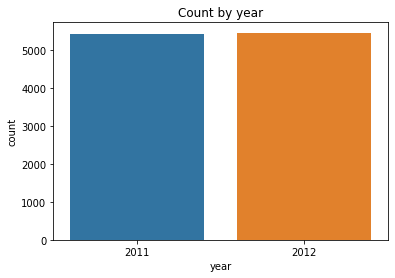

In [39]:
sns.countplot(x="year", data=datetime_df)
plt.title("Count by year")
plt.show()

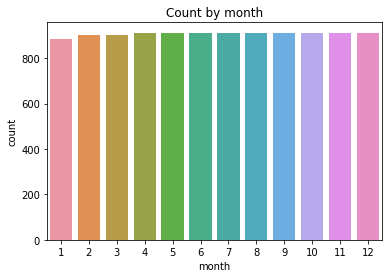

In [40]:
sns.countplot(x="month", data=datetime_df)
plt.title("Count by month")
plt.show()

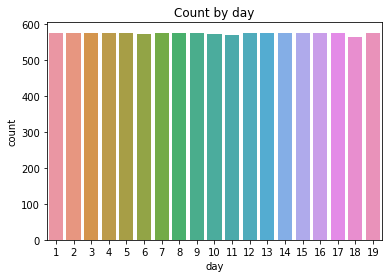

In [41]:
sns.countplot(x="day", data=datetime_df)
plt.title("Count by day")
plt.show()

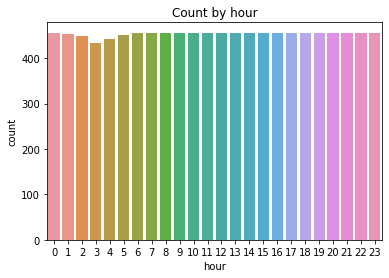

In [42]:
sns.countplot(x="hour", data=datetime_df)
plt.title("Count by hour")
plt.show()

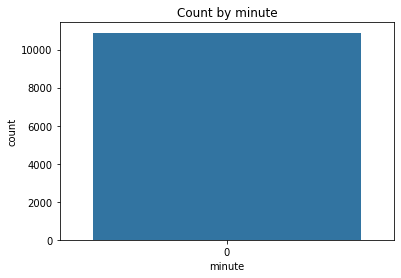

In [43]:
sns.countplot(x="minute", data=datetime_df)
plt.title("Count by minute")
plt.show()

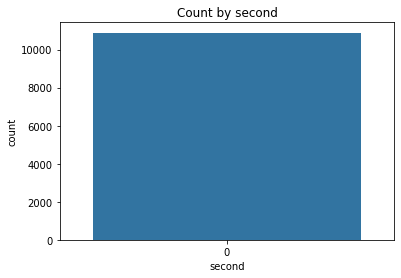

In [44]:
sns.countplot(x="second", data=datetime_df)
plt.title("Count by second")
plt.show()

Î≥¥Í∏∞ Ìé∏ÌïòÎèÑÎ°ù Í∑∏ÎûòÌîÑÎì§ÏùÑ ÌïúÎ≤àÏóê ÏãúÍ∞ÅÌôîÌïúÎã§.

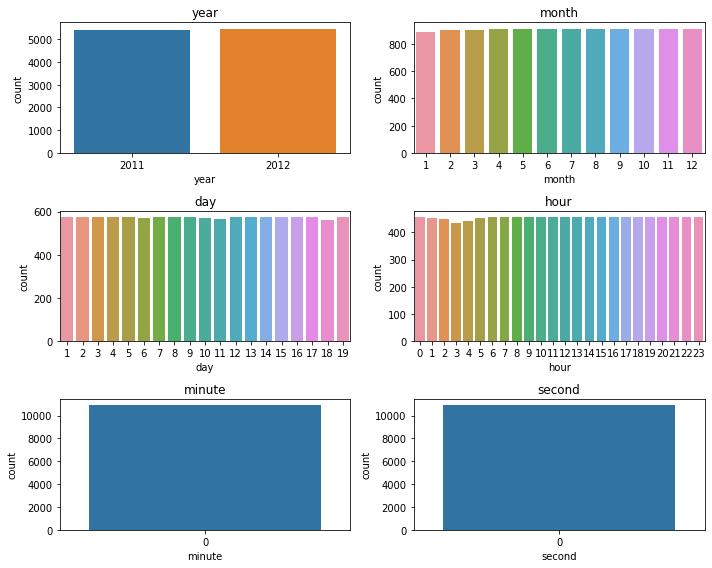

In [45]:
plt.figure(figsize = (10,8))

plt.subplot(3,2,1)
sns.countplot(x="year", data=datetime_df)
plt.title("year")

plt.subplot(3,2,2)
sns.countplot(x="month", data=datetime_df)
plt.title("month")

plt.subplot(3,2,3)
sns.countplot(x="day", data=datetime_df)
plt.title("day")

plt.subplot(3,2,4)
sns.countplot(x="hour", data=datetime_df)
plt.title("hour")

plt.subplot(3,2,5)
sns.countplot(x="minute", data=datetime_df)
plt.title("minute")

plt.subplot(3,2,6)
sns.countplot(x="second", data=datetime_df)
plt.title("second")

plt.tight_layout()
plt.show()

- minuteÏôÄ secondÎäî Î™®Îëê 0ÏúºÎ°ú ÎêòÏñ¥ÏûàÏñ¥ÏÑú Îç∞Ïù¥ÌÑ∞Ïóê ÌÅ∞ ÏùòÎØ∏Îäî ÏóÜÎäî Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêúÎã§.
- ÎÖÑ,Ïõî,Ïùº,Ïãú Îç∞Ïù¥ÌÑ∞ Í∞ôÏùÄ Í≤ΩÏö∞Ïóê Îç∞Ïù¥ÌÑ∞ Í∞ÑÏùò Í≤©Ï∞®Í∞Ä ÎààÏóê ÎùÑÍ≤å Î≥¥Ïù¥Îäî Í≤ÉÏù¥ ÏïÑÎãàÎùº ÏïÑÏâ¨ÏõÄÏù¥ ÏÉùÍ∏¥Îã§. Îç∞Ïù¥ÌÑ∞Ïóê Î≥ÄÌôîÎ•º Ï£ºÏñ¥ Îã§Î•∏ ÏãúÍ∞ÅÌôî Í∑∏ÎûòÌîÑÎ•º ÏÇ¨Ïö©Ìï¥ÎèÑ Îê† Í≤É Í∞ôÎã§.
- ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Î©¥ 3ÏãúÏóê ÎåÄÏó¨ ÏàòÍ∞Ä ÌôïÏó∞ÌïòÍ≤å Îñ®Ïñ¥ÏßÑÎã§Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
- Ïù¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏùòÎØ∏ÏûàÎäî Îç∞Ïù¥ÌÑ∞Îäî ÎÖÑ,Ïõî,Ïùº,Ïãú ÎùºÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. Î∂Ñ,Ï¥àÎäî ÏóÜÏï†ÎèÑ Îê† Í≤É Í∞ôÎã§.
___
- ÎÇòÎâú Ïª¨ÎüºÏù¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóê Ïú†Ïö©Ìïú Í≤ÉÏùÑ ÌôïÏù∏ÌñàÏúºÎãà Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Í∞Å ÌîÑÎ†àÏûÑÏùÑ Ï∂îÍ∞ÄÌï¥Ï£ºÍ∏∞Î°ú ÌïúÎã§.
- testÎç∞Ïù¥ÌÑ∞ÎèÑ ÎòëÍ∞ôÏù¥ ÎßåÎì§Ïñ¥Ï§ÄÎã§.

In [46]:
train["year"] = train['datetime'].dt.year   ## Ïó∞ dtY Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ÏÑú Ï∂îÍ∞Ä
train["month"] = train['datetime'].dt.month  ## Ïõî dtM Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ÏÑú Ï∂îÍ∞Ä
train["day"] = train['datetime'].dt.day    ## Ïùº dtD Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ÏÑú Ï∂îÍ∞Ä
train["hour"] = train['datetime'].dt.hour   ## Ïãú dth Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ÏÑú Ï∂îÍ∞Ä
train["minute"] = train['datetime'].dt.minute ## Î∂Ñ dtm Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ÏÑú Ï∂îÍ∞Ä
train["second"] = train['datetime'].dt.second ## Ï¥à dts Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ÏÑú Ï∂îÍ∞Ä

test["year"] = test['datetime'].dt.year   ## Ïó∞ dtY Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ÏÑú Ï∂îÍ∞Ä
test["month"] = test['datetime'].dt.month  ## Ïõî dtM Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ÏÑú Ï∂îÍ∞Ä
test["day"] = test['datetime'].dt.day    ## Ïùº dtD Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ÏÑú Ï∂îÍ∞Ä
test["hour"] = test['datetime'].dt.hour   ## Ïãú dth Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ÏÑú Ï∂îÍ∞Ä
test["minute"] = test['datetime'].dt.minute ## Î∂Ñ dtm Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ÏÑú Ï∂îÍ∞Ä
test["second"] = test['datetime'].dt.second ## Ï¥à dts Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ÏÑú Ï∂îÍ∞Ä

In [47]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

In [48]:
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  hour  minute  second  
0        56    26.0027  2011      1   20     0       0       0  
1        56     0.0000  2011      1   20     1       0       0  
2        56     0.0000  2011      1   20     2       0       0  
3        56    11.0014  2011      1   20     3       0       0  
4        56    11.0014  2011      1   20     4       0       0

### (4) Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [49]:
# datetime Ïª¨Îüº ÏÇ≠Ï†ú 
train = train.drop(columns="datetime")

test = test.drop(columns="datetime")

In [50]:
# Î∂Ñ,Ï¥à Ïª¨Îüº ÏÇ≠Ï†ú
train = train.drop(columns="minute")
train = train.drop(columns="second")

test = test.drop(columns="minute")
test = test.drop(columns="second")

In [51]:
# casual, registered Ïª¨Îüº ÏÇ≠Ï†ú
train = train.drop(columns="casual")
train = train.drop(columns="registered")

In [52]:
print(train.shape)
train.head()

(10886, 13)


season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   count  year  month  day  hour  
0     16  2011      1    1     0  
1     40  2011      1    1     1  
2     32  2011      1    1     2  
3     13  2011      1    1     3  
4      1  2011      1    1     4

In [53]:
print(test.shape)
test.head()

(6493, 12)


season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0           1        1  10.66  13.635        56     0.0000   
3       1        0           1        1  10.66  12.880        56    11.0014   
4       1        0           1        1  10.66  12.880        56    11.0014   

   year  month  day  hour  
0  2011      1   20     0  
1  2011      1   20     1  
2  2011      1   20     2  
3  2011      1   20     3  
4  2011      1   20     4

trainÍ≥º testÏùò Ïª¨ÎüºÏù¥ countÎ•º Ï†úÏô∏ÌïòÍ≥†Îäî ÎèôÏùºÌïú Ïª¨ÎüºÏùÑ Í∞ñÍ≤å ÎêòÏóàÎã§.

countÎäî Ïù¥Î≤à Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóêÏÑú targetÏóê Ìï¥ÎãπÌïòÎäî Í∞íÏù¥ÎØÄÎ°ú Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ Îïå Î∂ÑÎ¶¨Ìï¥Ï£ºÍ∏∞Î°ú ÌïúÎã§.

## 2-2. Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

### X,y Ïª¨Îüº ÏÑ†ÌÉù Î∞è train/test Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [54]:
# yÏóê ÌÉÄÍ≤ü Ìï†ÎãπÌï¥Ï£ºÍ∏∞
y = train["count"]
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [55]:
# ÌÉÄÍ≤üÏúºÎ°ú countÎ•º ÏÑ§Ï†ïÌñàÍ∏∞ ÎïåÎ¨∏Ïóê train Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Ï†úÏô∏ÏãúÌÇ®Îã§.
train = train.drop(columns = "count")
train.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  month  day  hour  
0  2011      1    1     0  
1  2011      1    1     1  
2  2011      1    1     2  
3  2011      1    1     3  
4  2011      1    1     4

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 18)

## 2-3. LinearRegrssion Î™®Îç∏ ÌïôÏäµ

In [57]:
# 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 2-4. ÌïôÏäµÎêú Î™®Îç∏Î°ú X_testÏóê ÎåÄÌïú ÏòàÏ∏°Í∞í Ï∂úÎ†• Î∞è ÏÜêÏã§Ìï®ÏàòÍ∞í Í≥ÑÏÇ∞

In [58]:
#
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred, squared=False)

In [59]:
#
rmse_val = rmse(y_test, y_pred)

print("RSME : ", rmse_val)

RSME :  142.17085115289714


## 2-5. xÏ∂ïÏùÄ tempÎòêÎäî humidityÎ°ú, yÏ∂ïÏùÄ countÎ°ú ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî

In [60]:
## Í≤∞Í≥ºÎ•º Í∞ÑÎã®ÌïòÍ≤å ÌôïÏù∏Ìï¥Î≥¥Í≥†Ïûê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÌïòÎÇò ÏÉàÎ°ú ÎßåÎì§Ïñ¥ Î≥¥ÏïòÎã§.
train_temp = X_test.copy()      
train_temp["pred"] = y_pred     
train_temp["tagt"] = y_test     
train_temp   

season  holiday  workingday  weather   temp   atemp  humidity  \
5833       1        0           1        1  13.94  14.395        36   
4889       4        0           1        3  18.86  22.725        88   
6369       1        0           1        2  17.22  21.210        50   
3832       3        0           0        1  30.34  34.090        55   
6163       1        0           1        1   4.92   6.060        50   
...      ...      ...         ...      ...    ...     ...       ...   
9494       3        0           1        2  22.96  26.515        83   
800        1        0           1        1  13.94  15.910        53   
1288       1        0           1        1  26.24  31.060        41   
1900       2        0           1        1  15.58  19.695        62   
1011       1        0           0        3  18.04  21.970       100   

      windspeed  year  month  day  hour        pred  tagt  
5833    35.0008  2012      1   18     6  164.480361    88  
4889    26.0027  2011     11   16    19  182.210074   111  
6369    19.9995  2012      3    2    15  240.419926    78  
3832    12.9980  2011      9   10    16  285.242661   431  
6163    15.0013  2012      2   13     1   37.616704     6  
...         ...   ...    ...  ...   ...         ...   ...  
9494    15.0013  2012      9   18    23  317.479236    78  
800     15.0013  2011      2   16    19  150.110030   161  
1288    19.0012  2011      3   18    13  229.743213   175  
1900     7.0015  2011      5    6     2   32.081526    16  
1011    15.0013  2011      3    6    15   54.982055     7  

[2178 rows x 14 columns]

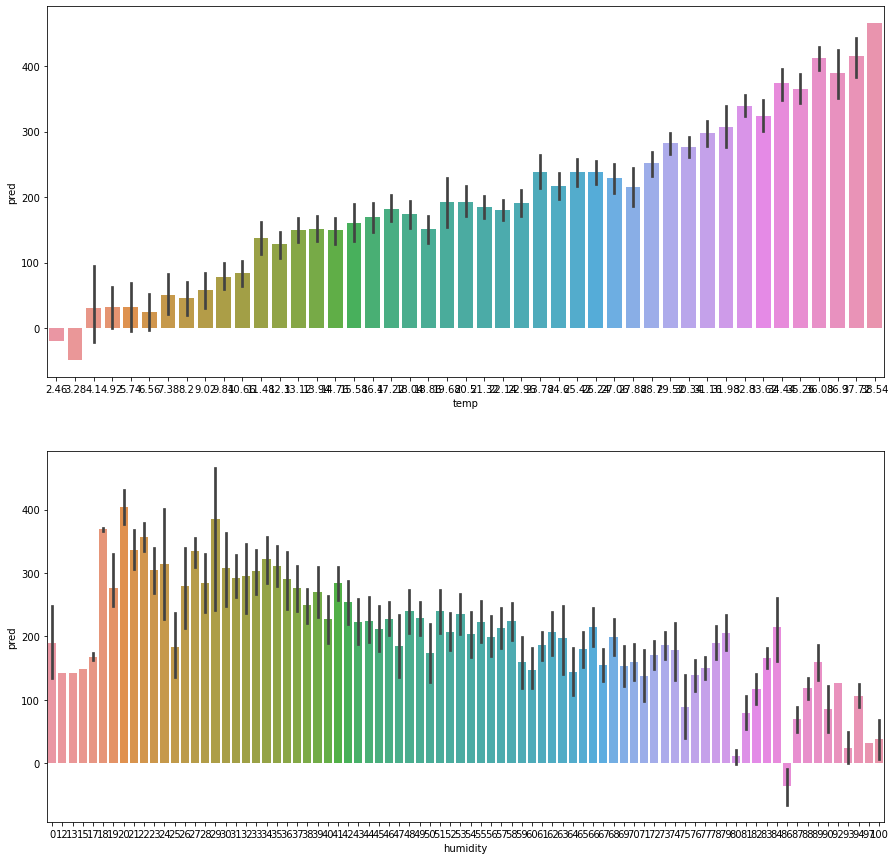

In [61]:
figure, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(15, 15)

## Ïò®ÎèÑÏóê Îî∞Î•∏ ÎåÄÏó¨ Í±¥Ïàò

sns.barplot(data=train_temp, x="temp", y="pred", ax=ax1)
## ÏäµÎèÑÏóê Îî∞Î•∏ ÎåÄÏó¨ Í±¥Ïàò
sns.barplot(data=train_temp, x="humidity", y="pred", ax=ax2)

plt.show()

Ïò®ÎèÑÍ∞Ä Ï¢ãÏùÑÏàòÎ°ù, ÏäµÎèÑÍ∞Ä ÎÇÆÏùÑÏàòÎ°ù ÏûêÏ†ÑÍ±∞ ÎåÄÏó¨Ïú®Ïù¥ ÎÜíÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

# 3. ÏïåÍ≤å Îêú ÎÇ¥Ïö©

1. return mean_squared_error(y_test, y_pred, squared=False)Î°ú RMSEÎ•º ÎÇòÌÉÄÎÇº Ïàò ÏûàÎäî Í≤ÉÏùÑ ÏïåÍ≤å ÎêòÏóàÎã§. MSEÏóê Î£®Ìä∏Î•º ÏîåÏõåÏ£ºÎäî ÏûëÏóÖÎßå ÏïåÍ≥† ÏûàÏóàÎäîÎç∞ Îçî Í∞ÑÎã®Ìïú ÏãùÏùÑ Ï∞æÏùÑ Ïàò ÏûàÍ≤å ÎêòÏñ¥ÏÑú Ï¢ãÏïòÎã§.

# 4. Ïñ¥Î†§Ïõ†Îçò Ï†ê & ÏùòÎ¨∏Ï†ê

1. ÌîÑÎ°úÏ†ùÌä∏ 1ÏùÑ ÏßÑÌñâÌï† Îïå diabetes.dataÏùò ÌÉÄÏûÖÏùÄ Ïù¥ÎØ∏ numpy.arrayÏùò ÌòïÌÉúÏòÄÎäîÎç∞ ÎÖ∏ÎìúÏóêÏÑú Ïôú Í∞íÎì§ÏùÑ Î≥ÄÌôòÌïòÎùºÍ≥† ÏßÄÏãúÌñàÎäîÏßÄ ÏùòÎ¨∏Ïù¥ Îì§ÏóàÎã§.(Ìï¥Í≤∞Ìï®)
    Í∑∏Îü¨ÎÇò Î™áÎ≤à ÏßÑÌñâÏùÑ ÌïòÎ©¥ÏÑú Íº≠ ÌïÑÏöîÌïú ÏûëÏóÖÏù¥ÎùºÎäî Í≤ÉÏùÑ ÏïåÍ≤å ÎêòÏóàÎã§.
2. lmsÏóêÎäî test Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§ÎùºÎäî Ïù¥ÏïºÍ∏∞Í∞Ä ÏóÜÏñ¥ Ï°∞Í∏à Ìï¥Î©®Îã§. ÏïÑÏßÅ Îç∞Ïù¥ÌÑ∞Î•º Îã§Î£®ÎäîÎç∞Ïóê ÎØ∏ÏàôÌïòÎã§Îäî Í≤å ÎäêÍª¥Ï†∏ÏÑú Ï°∞Í∏à ÏãúÎ¨¥Î£©ÌñàÎã§üòÇ
3. Ï†ÑÏóê ÌñàÎçò ÌîÑÎ°úÏ†ùÌä∏ÏôÄ Îã¨Î¶¨ trainÍ≥º testÎ•º Í∞ÅÍ∞Å Ï≤òÎ¶¨Ìï¥Ï§òÏïº ÌïòÎäî Í≤å Ï°∞Í∏à ÎÇØÏÑ§ÏóàÎã§.

# 5. ÌöåÍ≥†
- Î≤åÏç® 4Î≤àÏß∏ ÌîÑÎ°úÏ†ùÌä∏Ïù¥Îã§. Ìï† ÎïåÎßàÎã§ ÏãúÏûëÌï† Îïå Ïù¥Í±∏ Ìï† Ïàò ÏûàÏùÑÍπå? ÏÉùÍ∞ÅÏù¥ Îì§Í≥†  Î≤ÖÏ∞¨Îç∞ ÎßâÏÉÅÌï¥Î≥¥Î©¥ Îòê ÎêòÍ∏¥ ÌïòÎäî Í≤É Í∞ôÎã§. Í∑∏Îü∞Îç∞ Ìï≠ÏÉÅ Í≥ÑÌöçÌïúÎßåÌÅº ÏôÑÎ≤Ω?ÌïòÍ≤å ÏàòÌñâÌï† Ïàò ÏóÜÎäîÍ≤å ÏïÑÏâΩÍ≥† Î™®Î•¥Îäî Í≤å Í≥ÑÏÜç ÎÇòÏôÄÏÑú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏù¥ Ïû¨Î∞åÎäî Ìïú Ìé∏, Í±±Ï†ïÎèÑ ÎìúÎäî Í≤ÉÏù¥ ÏÇ¨Ïã§Ïù¥Îã§. Îß§Î≤à Í∏∞Ìïú ÎÇ¥Ïóê Ïó¨Ïú†Î°≠Í≤å ÎÅùÎÇ¥Í≥† Ïã∂ÏùÄ Îç∞ Îã§Î•∏ ÎÖ∏ÎìúÌïôÏäµÍ≥º Î≥ëÌñâÌïòÎ©∞ Í≤∞Íµ≠ ÌîÑÎ°úÏ†ùÌä∏ Í∏∞ÌïúÍπåÏßÄ ÎÅåÍ≥† Í∞ÄÎäî Í≤å ÏïÑÏâ¨Ïö¥ Í≤É Í∞ôÎã§. ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÎ©∞ ÏßÄÏãùÎèÑ ÎäêÎäî Í≤É Í∞ôÍ≥† ÏàòÌñâÎ†•ÎèÑ ÎÜíÏïÑÏßÑÎã§Í≥† ÏÉùÍ∞ÅÌïòÎäîÎç∞ Îã§Ïùå ÌîÑÎ°úÏ†ùÌä∏Î•º ÌïòÎã§Î≥¥Î©¥ Îòê Ï†ÑÍ≥º Îã¨ÎùºÏßÑ Í≤å ÏóÜÎäî Í∏∞Î∂ÑÏù¥ Îì†Îã§.
- Ïù¥Î≤à Ï£º ÍπåÏßÄ ÎÅùÎÇ¥Î©¥ Í∏∞Ï¥àÌÜµÍ≥ÑÍπåÏßÄ ÎßàÎ¨¥Î¶¨ÌïòÍ≤å ÎêòÎäîÎç∞ Í∑∏ÎèôÏïà Ìïú Í≥µÎ∂ÄÎ•º Ïûò Ï†ïÎ¶¨Ìï¥ Î≥¥Î©∞ Îã§Ïùå ÌîÑÎ°úÏ†ùÌä∏Îäî Ï¢Ä Îçî ÏàòÏõîÌïòÍ∏∞Î•º Í∏∞ÎåÄÌï¥Î≥∏Îã§.
- ÏΩîÎìúÎäî Í±∞ÏßìÎßêÌïòÏßÄ ÏïäÎäîÎã§Îäî ÎßêÏùÑ Ï≤¥Í∞êÌïòÍ≤å Îêú Í≤É Í∞ôÎã§. Ïò§Î•òÍ∞Ä ÎÇ¨ÏùÑ ÎïåÎäî Î®∏Î¶¨Î•º Î≤ÖÎ≤Ö Í∏ÅÏúºÎ©¥ÏÑú Í≥†Ïã¨ÌïòÍ≤å ÎêòÎäîÎç∞ Ï≤úÏ≤úÌûà Ïò¨ÎùºÍ∞ÄÎ≥¥Î©¥ Í≤∞Íµ≠ ÏΩîÎìúÏóê Ïò§Î•òÍ∞Ä ÏûàÏùåÏùÑ ÏïåÍ≤å ÎêúÎã§.
  Ïù¥Î≤àÏóêÎäî ÏΩîÎìúÏùò Ïò§Î•òÎì§ÏùÑ Ïä§Ïä§Î°ú ÎßéÏù¥ Ìï¥Í≤∞Ìï† Ïàò ÏûàÏñ¥ Ï¢ãÏïòÎã§.
- ÎãπÎá®Î≥ë Îç∞Ïù¥ÌÑ∞ÏóêÏÑú mse ÏàòÏπòÎ•º ÎßéÏù¥ Îñ®Ïñ¥Îú®Î¶¨ÏßÄ Î™ªÌïú Í≤ÉÏù¥ ÏïÑÏâΩÎã§.

# 6. Reference

- ÌöåÍ∑Ä (https://yhyun225.tistory.com/11)
- ÎãπÎá®Î≥ë Ï†ïÎ≥¥ (https://health.kdca.go.kr/healthinfo/biz/health/gnrlzHealthInfo/gnrlzHealthInfo/gnrlzHealthInfoView.do?cntnts_sn=5305)
- scatter (https://workingwithpython.com/matplotlib_scatterplot/), (https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=samsjang&logNo=220750096107), (https://blog.naver.com/PostView.nhn?blogId=cjh226&logNo=221266500054)
- to_datetime (https://steadiness-193.tistory.com/171)
- countplot(https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html)
- subplot (https://codetorial.net/matplotlib/subplot.html), (https://zephyrus1111.tistory.com/120)
